In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [16]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(answer))

In [29]:
# Грузим датасет, разделяем на 75 и 25%
boston = datasets.load_boston()
size=boston['target'].shape[0]
size_train=int(size*0.75)
y=boston['target'][0:size_train]
y_test=boston['target'][size_train:]
X=boston['data'][0:size_train]
X_test=boston['data'][size_train:]
print (size,size_train)
print (len(y),len(y_test))

506 379
379 127


In [3]:
def gbm_predict(X,coefficients_list,base_algorithms_list):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [30]:
def grad_boost(coefficients_list):
    N=50
    # массив базовых алгоритмов
    base_algorithms_list=[]
    # массив ошибок
    RMSE_list=[]
    #b0
    clf=DecisionTreeRegressor(max_depth=5,random_state=42)
    clf.fit(X, y)
    base_algorithms_list.append(clf)
    RMSE_list.append(np.sqrt(mean_squared_error(y_test,gbm_predict(X_test,coefficients_list,base_algorithms_list))))
    #вычисляем остальные алгоритмы    
    for n in range(1,N):
        a_pred=gbm_predict(X,coefficients_list,base_algorithms_list)
        # вычисляем сдвиг
        s=-(a_pred-y)
        y_new=y+s
        # Получаем новый базовый алгоритм
        clf=DecisionTreeRegressor(max_depth=5,random_state=42)
        clf.fit(X, y_new)
        base_algorithms_list.append(clf)
        rmse=np.sqrt(mean_squared_error(y_test,gbm_predict(X_test,coefficients_list,base_algorithms_list)))
        RMSE_list.append(rmse)
    return RMSE_list

# Задание 2

answer 2= 24.7485104309


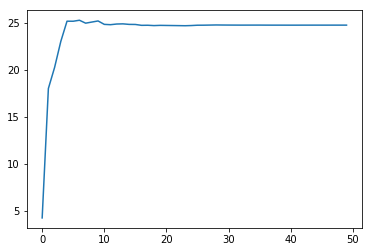

In [31]:
coeff2=[0.9]*50
rmse2=grad_boost(coeff2)
print ("answer 2=",rmse2[-1])
# 12.6411912587
plt.plot(range(50),rmse2)
plt.show()
write_answer_to_file(rmse2[-1],"test2_res2.txt")

# Задание 3

answer 3= 20.5298800416


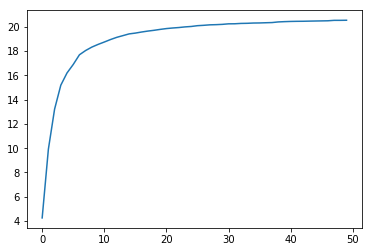

In [32]:
coeff3=[]
for i in range(50):
    coeff3.append(0.9 / (1.0 + i))
rmse3=grad_boost(coeff3)
print ("answer 3=",rmse3[-1])
plt.plot(range(50),rmse3)
plt.show()
write_answer_to_file(rmse3[-1],"test2_res3.txt")

## Задание 4

In [7]:
#number of regression trees (n_estimators) - количество деревьев
#depth of each individual tree (max_depth) - глубина
n_estimators_par = [1, 10, 50, 100, 200]
max_depth_par = [1, 2, 3, 4, 5, 6, 7, 8, 10,15,20,50,100]
rmse_scores=[]
import itertools
for params in itertools.product(n_estimators_par,max_depth_par):
    est = GradientBoostingRegressor(n_estimators=params[0],max_depth=params[1])
    est.fit(X,y)
    rmse=mean_squared_error(y_test,est.predict(X_test))**0.5
    rmse_scores.append(rmse)

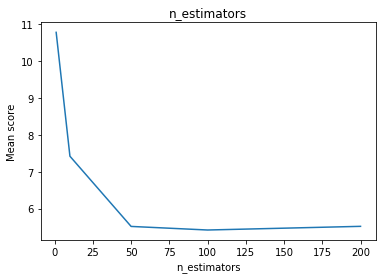

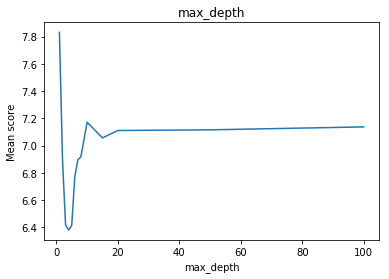

In [8]:
scores=np.array(rmse_scores).reshape(len(n_estimators_par), len(max_depth_par))
max_depth_mean=scores.mean(axis=0)
n_estimators_mean=scores.mean(axis=1)

plt.title("n_estimators")
plt.plot(n_estimators_par, n_estimators_mean)
plt.xlabel('n_estimators')
plt.ylabel('Mean score')
plt.show()

plt.title("max_depth")
plt.plot(max_depth_par, max_depth_mean)
plt.xlabel('max_depth')
plt.ylabel('Mean score')
plt.show()



# Задание 4

In [33]:
write_answer_to_file("1 4","test2_res4.txt")

## Да
1) С увеличением числа деревьев, начиная с некоторого момента, качество работы градиентного бустинга не меняется существенно.

## Нет
2) С увеличением числа деревьев, начиная с некоторого момента, градиентный бустинг начинает переобучаться.
## Да
3) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться
## Да
4) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться

## Задание 5

In [20]:
from sklearn import linear_model

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr_rmse=mean_squared_error(y_test,regr.predict(X_test))**0.5
print ("answer5=",regr_rmse)

answer5= 8.23209014665


In [23]:
write_answer_to_file(regr_rmse,"test2_res5.txt")